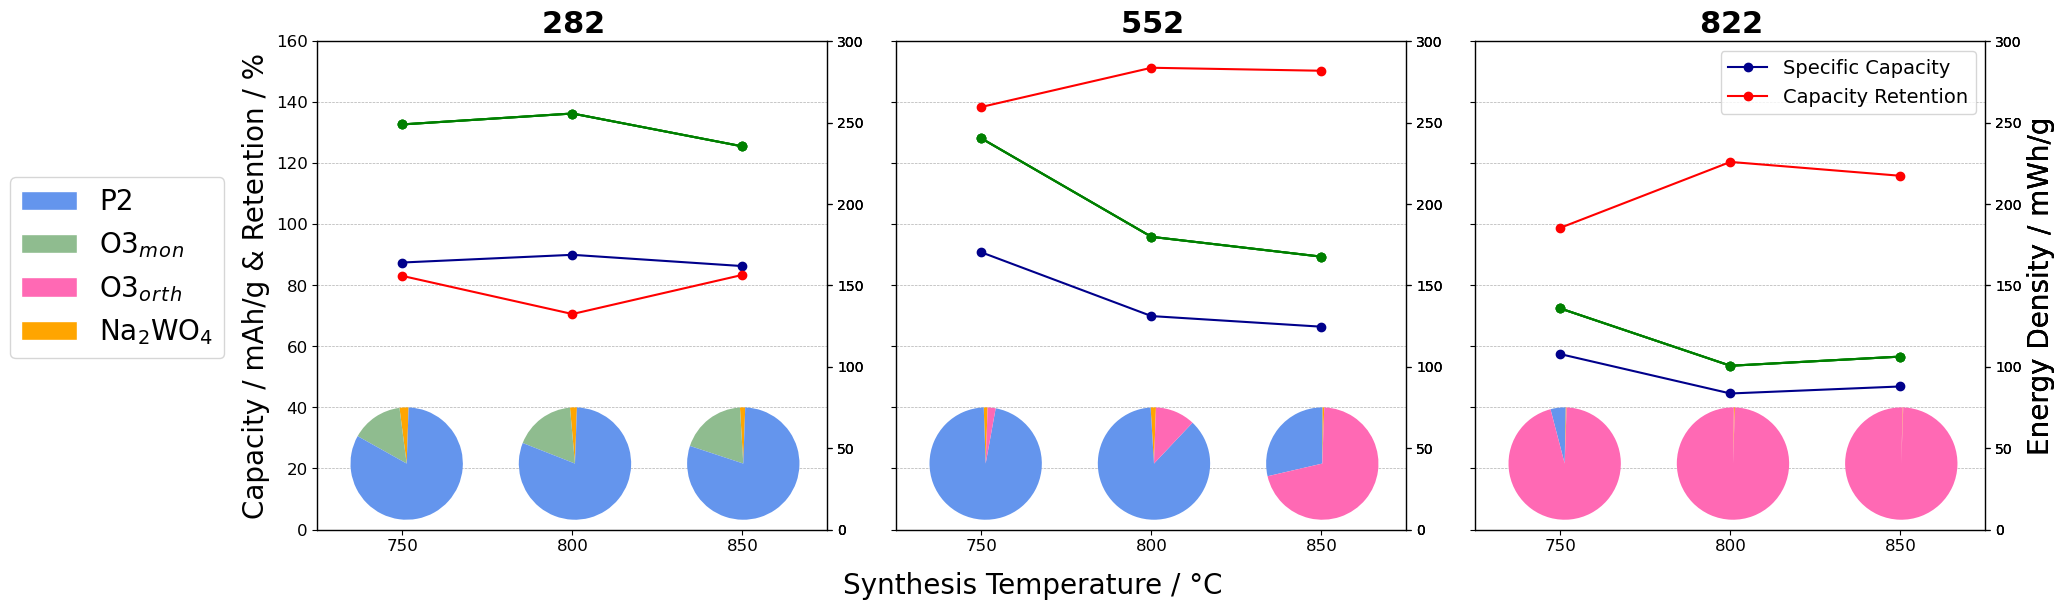

In [97]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the x-axis labels
X_AXIS = ('750', '800', '850')

# Define custom colors for the pie charts
custom_colors = {
    'P2': 'cornflowerblue',
    'O3$_m$$_o$$_n$': 'darkseagreen',
    'O3$_o$$_r$$_t$$_h$': 'hotpink',
    'Na$_2$WO$_4$': 'orange',
}

# Define the data for each plot
data = [
    {
        'data': {
            'Na$_2$WO$_4$': (2.6, 1.97, 1.5),
            'O3$_m$$_o$$_n$': (14.84, 17.62, 18.98),
            'P2': (82.56, 80.42, 79.52),
            'O3$_o$$_r$$_t$$_h$': (0.0, 0.0, 0.0),
        },
        'specific_capacity': {
            '750': 87.47,
            '800': 89.99,
            '850': 86.30,
        },
        'capacity_retention': {
            '750': 83.07,
            '800': 70.59,
            '850': 83.41,
        },
        'energy_density': {
            '750': 248.83,
            '800': 255.53,
            '850': 235.34,
        }
    },
    {
        'data': {
            'Na$_2$WO$_4$': (1.11, 1.51, 0.53),
            'O3$_m$$_o$$_n$': (0, 0, 0),
            'P2': (96.59, 87.01, 28.68),
            'O3$_o$$_r$$_t$$_h$': (2.3, 11.48, 70.89),
        },
        'specific_capacity': {
            '750': 90.80,
            '800': 69.92,
            '850': 66.44,
        },
        'capacity_retention': {
            '750': 138.43,
            '800': 151.27,
            '850': 150.29,
        },
        'energy_density': {
            '750': 240.23,
            '800': 179.79,
            '850': 167.59,
        }
    },
    {
        'data': {
            'Na$_2$WO$_4$': (0.29, 0.3, 0.17),
            'O3$_m$$_o$$_n$': (0, 0, 0),
            'P2': (4.33, 0, 0),
            'O3$_o$$_r$$_t$$_h$': (95.38, 99.7, 99.84),
        },
        'specific_capacity': {
            '750': 57.45,
            '800': 44.56,
            '850': 46.86,
        },
        'capacity_retention': {
            '750': 98.85,
            '800': 120.42,
            '850': 115.88,
        },
        'energy_density': {
            '750': 135.77,
            '800': 100.58,
            '850': 106.21,
        }
    }
]

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Iterate through each data entry
for i, entry in enumerate(data):
    # Extract specific capacity and capacity retention values
    specific_capacity_values = list(entry['specific_capacity'].values())
    capacity_retention_values = list(entry['capacity_retention'].values())
    energy_density_values = list(entry['energy_density'].values())
    
    # Plot specific capacity and capacity retention on the primary y-axis
    axs[i].plot([750, 800, 850], specific_capacity_values, color='darkblue', marker='o', linestyle='-', label='Specific Capacity')
    axs[i].plot([750, 800, 850], capacity_retention_values, color='red', marker='o', linestyle='-', label='Capacity Retention')
    
    # Set labels and titles
    #axs[i].set_xlabel('Synthesis Temperature / °C', fontsize=20)
    if i == 0:
        axs[i].set_ylabel('Capacity / mAh/g & Retention / %', fontsize=20)
    axs[i].set_title(r'$\mathbf{282}$' if i == 0 else r'$\mathbf{552}$' if i == 1 else r'$\mathbf{822}$', fontsize=22)
    axs[i].set_xticks([750, 800, 850])
    axs[i].set_xlim(725, 875)
    axs[i].set_ylim(0, 160)
    axs[i].grid(axis='y', linestyle='--', linewidth=0.5)
    axs[i].tick_params(axis='both', which='major', labelsize=12)

    # Plot pie charts for each temperature point
    for j, x_value in enumerate([750, 800, 850]):
        pie_data = [entry['data'][key][j] for key in entry['data'].keys()]
        ax_pie = axs[i].inset_axes([0.01 + j*0.33, 0.01, 0.33, 0.25])
        ax_pie.pie(pie_data, startangle=88, radius=1.15, colors=[custom_colors[key] for key in entry['data'].keys()])
        ax_pie.set_aspect('equal', adjustable='datalim')
    
    # Add twin axes for energy density on the right-hand side only for the last plot
   # if i == 2:
        axs_energy = axs[i].twinx()
        axs_energy.plot([750, 800, 850], energy_density_values, color='green', marker='o', linestyle='-', label='Energy Density')
        #axs_energy.set_ylabel('Energy Density / Wh/kg', fontsize=20, color='black')
        axs_energy.set_ylim(0, 300)
        if i == 2:
            axs_energy.set_ylabel('Energy Density / mWh/g', fontsize=20, color='black')
            #axs_energy.tick_params(axis='y', labelcolor='black')
            axs_energy.tick_params(axis='y', which='both', left=False, labelleft=False)
            

# Add legends
legend_elements = [Patch(facecolor=color, edgecolor='white', label=label) for label, color in custom_colors.items()]
axs[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.63, 0.75), fontsize=20)
axs[2].legend(loc='upper right', fontsize=14)


fig.text(0.5, -0.02, 'Synthesis Temperature / °C', ha='center', fontsize=20)

# Adjust layout and save the figure
plt.subplots_adjust(wspace=0.1)
plt.tight_layout(pad=2)

output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/282552822Piecharts.png"
plt.savefig(output_file, format='png', bbox_inches='tight')

plt.show()
